## desempenho da classificação RF, SVM e MLP


## Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score,make_scorer

In [ ]:
node = pd.read_csv('dataset.csv')
node.head()

/tmp/ipykernel_277581/384406800.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  node = pd.read_csv('dataset_final_original.csv')


,NFT,mean_price_2021,mean_price_2020,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,...,mean_buyer_neighbors_src,clustering_coeficient_src,NFT_mean_origin_dest,NFT_mean_destiny_dest,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,Quartil
0,42.0,70050.01085,10269.236238,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,1034.580857,253.527651,86,81,...,240.936430,0.045235,10269.236238,0.0,0,1,1034.580857,0.0,0.000000,3
1,20016.0,4277.31000,1424.668500,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,8.766928,53.077299,47,34,...,9.399471,0.027323,4.785054,0.0,0,732,97.087661,0.0,0.025829,3
2,242910.0,535.64700,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,148.031668,75.508656,169,225,...,63.632370,0.033500,30.078725,0.0,0,1615,37.155423,0.0,0.001394,3
3,264534.0,610.58390,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,148.031668,75.508656,169,225,...,63.632370,0.033500,30.078725,0.0,0,1615,37.155423,0.0,0.001394,3
4,302937.0,1519.36120,221.367562,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,82.963954,74.443832,15,38,...,27.646200,0.043968,30.078725,0.0,0,1615,37.155423,0.0,0.001394,3


In [3]:
node

,NFT,mean_price_2021,mean_price_2020,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,...,mean_buyer_neighbors_src,clustering_coeficient_src,NFT_mean_origin_dest,NFT_mean_destiny_dest,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,Quartil
0,42.0,70050.010850,10269.236238,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,1034.580857,253.527651,86,81,...,240.936430,0.045235,10269.236238,0.000000,0,1,1034.580857,0.000000,0.000000,3
1,20016.0,4277.310000,1424.668500,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,8.766928,53.077299,47,34,...,9.399471,0.027323,4.785054,0.000000,0,732,97.087661,0.000000,0.025829,3
2,242910.0,535.647000,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,148.031668,75.508656,169,225,...,63.632370,0.033500,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
3,264534.0,610.583900,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,148.031668,75.508656,169,225,...,63.632370,0.033500,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
4,302937.0,1519.361200,221.367562,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,82.963954,74.443832,15,38,...,27.646200,0.043968,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69430,9998825238229210287078128415892911766717578886...,28.326590,12.321692,0x01804886807bb66bf1208657f4ce895ad0ff1dfc,0x399f298fb0f0ac25398f30c83b4cfdfe904bf289,12.471680,11.580102,11.219564,68,11,...,60.533621,0.108964,45.277558,36.254993,12,27,49.111220,109.640314,0.214575,2
69431,9999,118.513317,45.894007,0x43a7484431cc7cbc9220dec7cd85420492dbe572,0x9b0726e95e72eb6f305b472828b88d2d2bdd41c7,12.015045,29.676000,17.169569,5,2,...,54.404175,0.023810,23.142626,39.397886,4,22,60.010498,19.441722,0.007692,2
69432,99992,313.177000,104.078731,0x7a38760c295f1ea086005214a279fb1280010483,0xc88fe9bfce6294c0faa5eb3fbed02cdd6b59cd95,188.059880,293.606414,190.546246,10,7,...,353.679786,0.033088,24.835629,30.291269,76,203,79.863344,66.195274,0.022668,3
69433,9999800110335981664101193032831097660115582765...,24.933225,42.088425,0x3603cb5217bff0b3a88fe1537f9ba81848cebbac,0x19804927f74c3c0899afd49d56bff6ddae6cf518,43.539750,34.149388,28.827454,79,72,...,61.282882,0.105145,30.381674,22.704203,260,551,45.117875,58.126618,0.042115,2


In [4]:
combined_series = pd.concat([node['last_owner'], node['origin_seller']], ignore_index=True)
unique_count_combined = combined_series.nunique()

print(unique_count_combined)

24987


## Filtragem e limpeza dos dados

In [5]:
filter = node.drop(['NFT_mean_origin_src',
       'NFT_mean_destiny_src', 'in_degree_src', 'out_degree_src',
       'mean_seller_neighbors_src', 'mean_buyer_neighbors_src',
       'clustering_coeficient_src'], axis = 1)

In [4]:
filter

,NFT,mean_price_2021,mean_price_2020,last_owner,origin_seller,Price_USD,NFT_mean_origin_dest,NFT_mean_destiny_dest,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,Quartil
0,42.0,70050.010850,10269.236238,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,10269.236238,0.000000,0,1,1034.580857,0.000000,0.000000,3
1,20016.0,4277.310000,1424.668500,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,4.785054,0.000000,0,732,97.087661,0.000000,0.025829,3
2,242910.0,535.647000,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
3,264534.0,610.583900,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
4,302937.0,1519.361200,221.367562,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69430,9998825238229210287078128415892911766717578886...,28.326590,12.321692,0x01804886807bb66bf1208657f4ce895ad0ff1dfc,0x399f298fb0f0ac25398f30c83b4cfdfe904bf289,12.471680,45.277558,36.254993,12,27,49.111220,109.640314,0.214575,2
69431,9999,118.513317,45.894007,0x43a7484431cc7cbc9220dec7cd85420492dbe572,0x9b0726e95e72eb6f305b472828b88d2d2bdd41c7,12.015045,23.142626,39.397886,4,22,60.010498,19.441722,0.007692,2
69432,99992,313.177000,104.078731,0x7a38760c295f1ea086005214a279fb1280010483,0xc88fe9bfce6294c0faa5eb3fbed02cdd6b59cd95,188.059880,24.835629,30.291269,76,203,79.863344,66.195274,0.022668,3
69433,9999800110335981664101193032831097660115582765...,24.933225,42.088425,0x3603cb5217bff0b3a88fe1537f9ba81848cebbac,0x19804927f74c3c0899afd49d56bff6ddae6cf518,43.539750,30.381674,22.704203,260,551,45.117875,58.126618,0.042115,2


In [6]:
filter.to_csv('dataset_v2.csv', index = False)

### Implementação dos modelos

In [7]:
X = filter.drop(['Quartil', 'NFT', 'mean_price_2021', 'mean_price_2020','last_owner','origin_seller','Price_USD'], axis = 1)
y =filter['Quartil']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [8]:
features_antigas = ['NFT_mean_origin_dest', 'NFT_mean_destiny_dest', 'in_degree_dest', 'out_degree_dest', 'mean_seller_neighbors_dest', 'mean_buyer_neighbors_dest', 'clustering_coeficient_dest']

features_novas = ['NFT_mean_origin', 'NFT_mean_destiny', 'in_degree', 'out_degree', 'mean_seller_neighbors', 'mean_buyer_neighbors', 'clustering_coeficient']


mapeamento_renomear = dict(zip(features_antigas, features_novas))


X = X.rename(columns=mapeamento_renomear)

In [9]:
print(f"Formato dos dados de treino escalados: {X_train_scaled.shape}")
print(f"Formato dos dados de teste escalados: {X_test_scaled.shape}")

Formato dos dados de treino escalados: (52076, 7)
Formato dos dados de teste escalados: (17359, 7)


In [10]:
feature_names_for_plot = X.columns.tolist()
feature_names_for_plot

['NFT_mean_origin',
 'NFT_mean_destiny',
 'in_degree',
 'out_degree',
 'mean_seller_neighbors',
 'mean_buyer_neighbors',
 'clustering_coeficient']

## Métricas

In [11]:
def calcula_metricas(model,y_test,X_test_scaled):
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

  print(f"Acurácia: {accuracy:.4f}")
  print(f"Precisão: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-score: {f1:.4f}")
  print(classification_report(y_pred, y_test))
  return y_pred

## Implementação do modelo - MLP Classifier

In [12]:
net_mlp = MLPClassifier(max_iter = 1000, verbose = True, tol = 0.000001, solver = 'adam', activation = 'relu')
net_mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.86217391
Iteration 2, loss = 0.77293340
Iteration 3, loss = 0.74357178
Iteration 4, loss = 0.72652602
Iteration 5, loss = 0.71583554
Iteration 6, loss = 0.70649130
Iteration 7, loss = 0.70002727
Iteration 8, loss = 0.69457306
Iteration 9, loss = 0.69005923
Iteration 10, loss = 0.68606727
Iteration 11, loss = 0.68253249
Iteration 12, loss = 0.67948700
Iteration 13, loss = 0.67688689
Iteration 14, loss = 0.67484708
Iteration 15, loss = 0.67236622
Iteration 16, loss = 0.67065599
Iteration 17, loss = 0.66933740
Iteration 18, loss = 0.66770030
Iteration 19, loss = 0.66677768
Iteration 20, loss = 0.66500072
Iteration 21, loss = 0.66370863
Iteration 22, loss = 0.66256904
Iteration 23, loss = 0.66126377
Iteration 24, loss = 0.66015440
Iteration 25, loss = 0.65922292
Iteration 26, loss = 0.65751725
Iteration 27, loss = 0.65733578
Iteration 28, loss = 0.65544832
Iteration 29, loss = 0.65428382
Iteration 30, loss = 0.65332437
Iteration 31, loss = 0.65248608
Iteration 32, los

MLPClassifier(max_iter=1000, tol=1e-06, verbose=True)

### Métricas de Avaliação MLP

In [13]:
a = calcula_metricas(net_mlp,y_test,X_test_scaled)

Acurácia: 0.7416
Precisão: 0.7677
Recall: 0.7028
F1-score: 0.7253
              precision    recall  f1-score   support

           1       0.68      0.82      0.74      3547
           2       0.86      0.70      0.77     10597
           3       0.57      0.78      0.66      3215

    accuracy                           0.74     17359
   macro avg       0.70      0.77      0.73     17359
weighted avg       0.77      0.74      0.75     17359



### Matriz de confusão

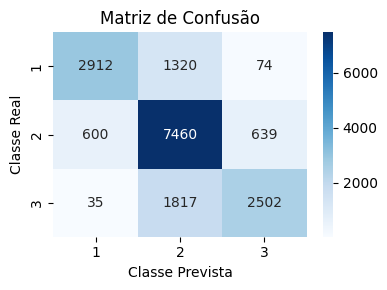

In [14]:
cf_matrix = confusion_matrix(y_test, a)
class_names = np.unique(y_test) 
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.savefig('confusion_mlp.pdf')
plt.show()


# Implementação do SHapley Additive exPlanations - SHAP

É uma maneira de calcular o impacto de uma característica no valor da variável-alvo.

- Um valor SHAP positivo para uma característica significa que essa característica aumentou a previsão do modelo
- Um valor SHAP negativo para uma característica significa que ela diminuiu a previsão do modelo

In [14]:
import shap
from sklearn.cluster import MiniBatchKMeans
# !pip install shap

/home/nara/Documentos/2025.1/IC/jupyter/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
shap.initjs()

## Implementação do SHapley Additive exPlanations Para o modelo MLP

In [16]:
print("Criando background dataset para KernelExplainer (usando MiniBatchKMeans para amostragem representativa)...")
kmeans = MiniBatchKMeans(n_clusters=100, random_state=0, n_init='auto') # n_clusters = tamanho do background dataset
kmeans.fit(X_train_scaled)
X_train_scaled_summary = kmeans.cluster_centers_ # Usamos os centroides dos clusters como background


Criando background dataset para KernelExplainer (usando MiniBatchKMeans para amostragem representativa)...


In [17]:
explainer = shap.KernelExplainer(net_mlp.predict_proba, X_train_scaled_summary)

shap_values = explainer.shap_values(X_test_scaled)

100%|█████████████████████████████████████| 17359/17359 [05:03<00:00, 57.13it/s]


In [18]:
# --- VERIFICAÇÃO DE DIMENSÃO SHAP ---
print("\n--- VERIFICAÇÃO DE SHAP VALUES SHAPE (para KernelExplainer) ---")

if isinstance(shap_values, list):
    print(f"shap_values é uma lista (Multiclasse). Quantidade de classes: {len(shap_values)}")
    num_expected_features = X_test_sample_for_shap.shape[1] 
    
    for i, class_shap_values in enumerate(shap_values):
        print(f"  shap_values[{i}] (Classe SHAP Index {i}) shape: {class_shap_values.shape}")
        if class_shap_values.shape[1] != num_expected_features:
            print(f"  **ERRO CRÍTICO DE DIMENSÃO DETECTADO EM shap_values[{i}]**: Esperado {num_expected_features} colunas, mas obteve {class_shap_values.shape[1]}.")
            print(f"  Isso significa que o KernelExplainer gerou valores SHAP com um número incorreto de features para esta classe.")
          
else:
    print(f"shap_values é um array NumPy. Shape: {shap_values.shape}")
    num_expected_features = X_test_scaled.shape[1]
    if shap_values.shape[1] != num_expected_features:
        print(f"  **ERRO CRÍTICO DE DIMENSÃO DETECTADO**: Esperado {num_expected_features} colunas, mas obteve {shap_values.shape[1]}.")
        print(f"  Isso significa que o KernelExplainer gerou valores SHAP com um número incorreto de features.")



--- VERIFICAÇÃO DE SHAP VALUES SHAPE (para KernelExplainer) ---
shap_values é um array NumPy. Shape: (17359, 7, 3)


In [19]:
print(f"X_test_sample_for_shap shape: {X_test_scaled.shape}")
print(f"Número de features esperadas (len(features)): {len(feature_names_for_plot)}")
print(f"Nomes das features usados para plotagem: {feature_names_for_plot}")
print("--- FIM DA VERIFICAÇÃO DE SHAP VALUES SHAPE ---\n")

X_test_sample_for_shap shape: (17359, 7)
Número de features esperadas (len(features)): 7
Nomes das features usados para plotagem: ['NFT_mean_origin', 'NFT_mean_destiny', 'in_degree', 'out_degree', 'mean_seller_neighbors', 'mean_buyer_neighbors', 'clustering_coeficient']
--- FIM DA VERIFICAÇÃO DE SHAP VALUES SHAPE ---



In [20]:
class_names = net_mlp.classes_
print(f"Classes do modelo (net_mlp.classes_): {class_names}")

try:
    index_of_class_1_quartil = np.where(class_names == 1)[0][0]
    print(f"Quartil 1 (valor da classe 1) está no índice de SHAP: {index_of_class_1_quartil}")
except IndexError:
    print("\nAVISO: A classe '1' não foi encontrada em net_mlp.classes_. Verifique os valores únicos de y_train.")
    print("Assumindo que a primeira classe (índice 0) dos SHAP values corresponde à classe desejada para o plot.")
    index_of_class_1_quartil = 0 


Classes do modelo (net_mlp.classes_): [1 2 3]
Quartil 1 (valor da classe 1) está no índice de SHAP: 0


In [21]:
shap_values_for_class_1_plot = shap_values[:, :, index_of_class_1_quartil]
print(f"Shape de shap_values_for_class_1_plot (para plotagem da Classe 1): {shap_values_for_class_1_plot.shape}")

Shape de shap_values_for_class_1_plot (para plotagem da Classe 1): (17359, 7)



Gerando Gráfico de Barra de Importância SHAP (Bar Plot)...


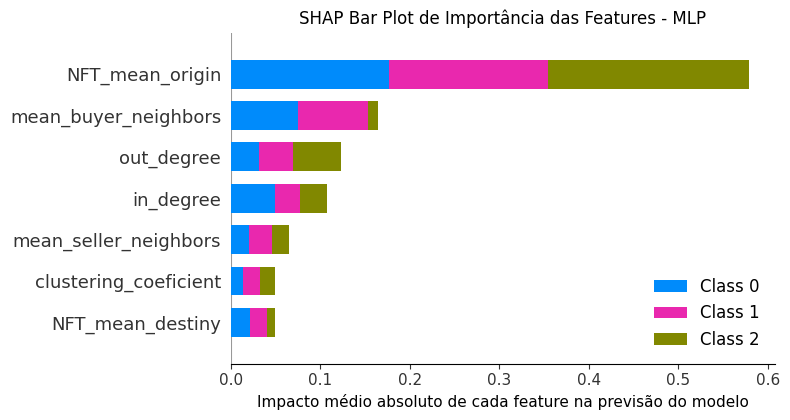

Gráfico de Barra de Importância SHAP salvo como 'shap_bar_importance_plot_mlp_normalized.png'
Gerando Gráfico de Resumo SHAP (Beeswarm Plot) para a Classe 1...


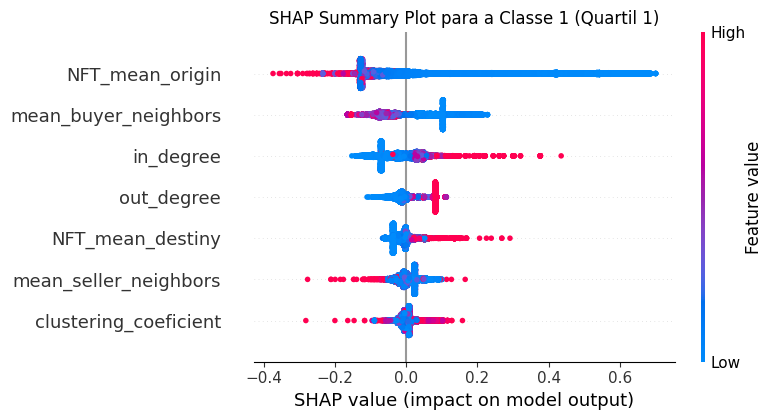

Gráfico de Resumo SHAP (Classe 1) salvo como 'shap_summary_plot_class_1_mlp_normalized_sample.png'


In [22]:
print("\nGerando Gráfico de Barra de Importância SHAP (Bar Plot)...")
plt.figure(figsize=(4, 3))
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=feature_names_for_plot, show=False)
plt.title('SHAP Bar Plot de Importância das Features - MLP')
plt.xlabel('Impacto médio absoluto de cada feature na previsão do modelo', fontsize = 11)
plt.tight_layout()
plt.savefig('Graficos/shap_bar_importance_plot_mlp_normalized.pdf')
plt.show()
plt.close()
print("Gráfico de Barra de Importância SHAP salvo como 'shap_bar_importance_plot_mlp_normalized.png'")



print("Gerando Gráfico de Resumo SHAP (Beeswarm Plot) para a Classe 1...")
plt.figure(figsize=(4, 3))
shap.summary_plot(shap_values_for_class_1_plot, X_test_scaled, feature_names=feature_names_for_plot, show=False)
plt.title('SHAP Summary Plot para a Classe 1 (Quartil 1)')
plt.tight_layout()
plt.savefig('Graficos/shap_summary_plot_class_1_mlp_normalized_sample.pdf')
plt.show()
plt.close()
print("Gráfico de Resumo SHAP (Classe 1) salvo como 'shap_summary_plot_class_1_mlp_normalized_sample.png'")




Gerando Gráficos de Dependência SHAP para as 3 features mais importantes...
As 3 features mais importantes são: ['NFT_mean_origin', 'mean_buyer_neighbors', 'out_degree']
Gerando SHAP Dependence Plot para: NFT_mean_origin


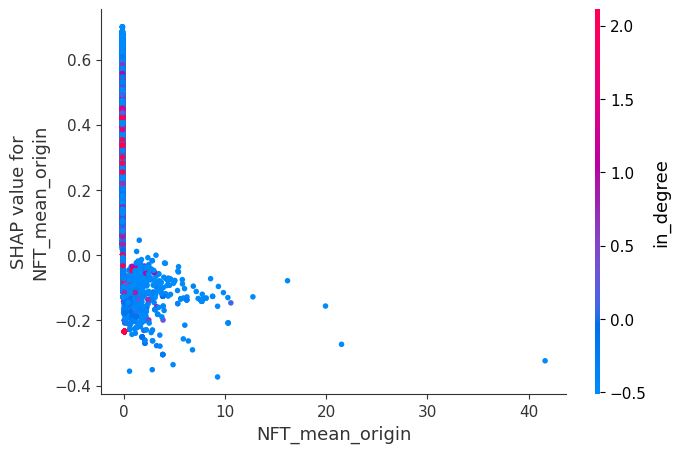

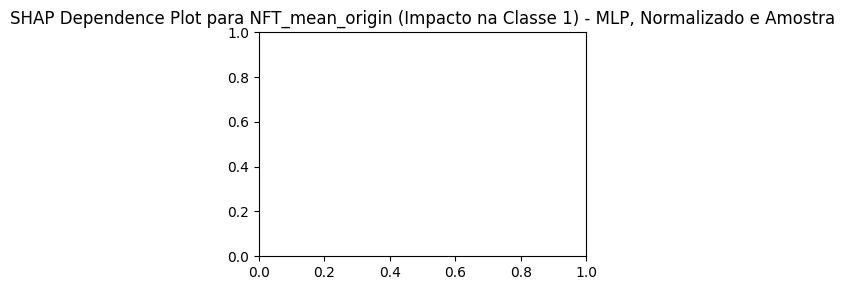

SHAP Dependence Plot para NFT_mean_origin salvo como 'shap_dependence_plot_NFT_mean_origin_mlp_normalized_sample.png'
Gerando SHAP Dependence Plot para: mean_buyer_neighbors


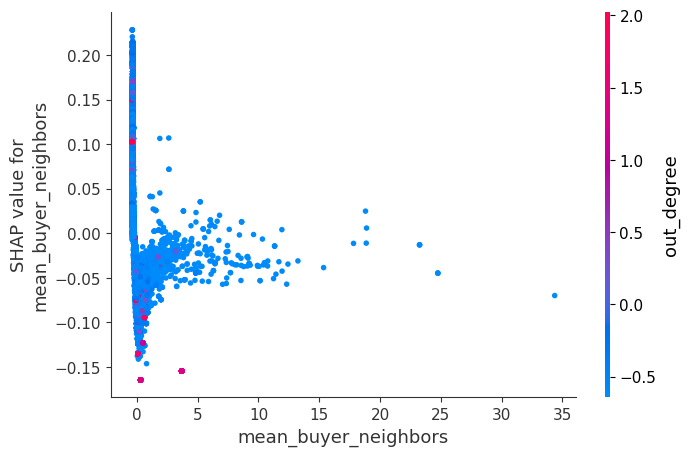

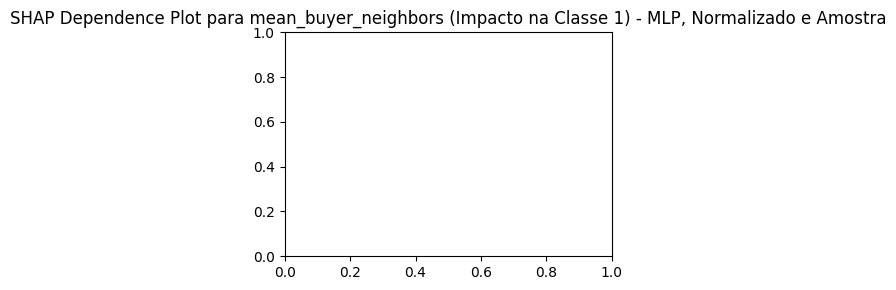

SHAP Dependence Plot para mean_buyer_neighbors salvo como 'shap_dependence_plot_mean_buyer_neighbors_mlp_normalized_sample.png'
Gerando SHAP Dependence Plot para: out_degree


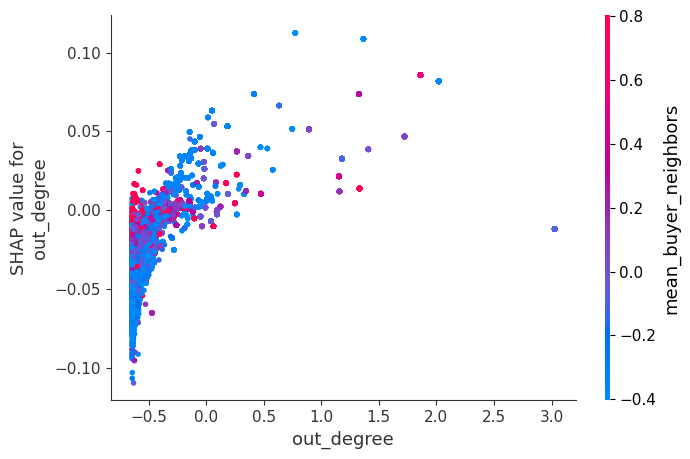

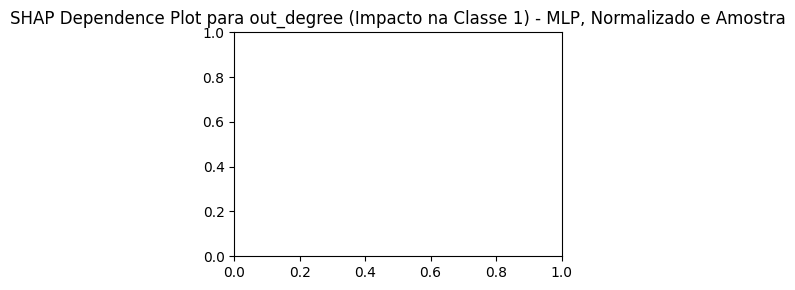

SHAP Dependence Plot para out_degree salvo como 'shap_dependence_plot_out_degree_mlp_normalized_sample.png'


In [23]:
print("\nGerando Gráficos de Dependência SHAP para as 3 features mais importantes...")

if isinstance(shap_values, list):
    abs_shap_values_combined = np.abs(np.array(shap_values)).sum(axis=0)
    mean_abs_shap_values_per_feature = np.mean(abs_shap_values_combined, axis=0)
else: 
    mean_abs_shap_values_per_feature = np.mean(np.abs(shap_values), axis=(0, 2))

feature_importance_df = pd.DataFrame({
    'feature': feature_names_for_plot,
    'mean_abs_shap_value': mean_abs_shap_values_per_feature
})
feature_importance_df = feature_importance_df.sort_values(by='mean_abs_shap_value', ascending=False)
top_3_features = feature_importance_df['feature'].head(3).tolist()

print(f"As 3 features mais importantes são: {top_3_features}")

for feature in top_3_features:
    print(f"Gerando SHAP Dependence Plot para: {feature}")
    if shap_values_for_class_1_plot is not None:
        try:
            shap.dependence_plot(feature, shap_values_for_class_1_plot, X_test_scaled, feature_names=feature_names_for_plot, show=False)
            plt.figure(figsize=(4, 3))
            plt.title(f'SHAP Dependence Plot para {feature} (Impacto na Classe 1) - MLP, Normalizado e Amostra')
            plt.tight_layout()
            plt.savefig(f'Graficos/shap_dependence_plot_{feature}_mlp_normalized_sample.pdf')
            plt.show()
            plt.close()
            print(f"SHAP Dependence Plot para {feature} salvo como 'shap_dependence_plot_{feature}_mlp_normalized_sample.png'")
        except AssertionError as e:
            print(f"\nERRO (Persistent) ao gerar Dependence Plot para {feature}: {e}")
            print("O shap.dependence_plot também está reportando uma incompatibilidade de dimensão.")
        except Exception as e:
            print(f"\nERRO inesperado ao gerar Dependence Plot para {feature}: {e}")
    else:
        print(f"\nNão foi possível gerar o Dependence Plot para {feature} devido a um problema de formato dos SHAP values.")


# Random Forest Classifier

In [24]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score,make_scorer

In [25]:
# 2. Preparando os dados para o modelo
features = [
    'NFT_mean_origin_dest',
       'NFT_mean_destiny_dest', 'in_degree_dest', 'out_degree_dest',
       'mean_seller_neighbors_dest', 'mean_buyer_neighbors_dest',
       'clustering_coeficient_dest'
]
target = 'Quartil'

missing_features = [f for f in features if f not in filter.columns]
if missing_features:
    print(f"\nErro: As seguintes colunas de feature não foram encontradas no dataset: {missing_features}")
    exit()

if target not in filter.columns:
    print(f"\nErro: A coluna target '{target}' não foi encontrada no dataset.")
    exit()

X = filter[features]
y = filter[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nFormato dos dados de treino: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Formato dos dados de teste: X_test={X_test.shape}, y_test={y_test.shape}")



Formato dos dados de treino: X_train=(55548, 7), y_train=(55548,)
Formato dos dados de teste: X_test=(13887, 7), y_test=(13887,)


In [26]:
# 3. Implementando e Treinando o Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
print("\nTreinando o modelo Random Forest Classifier...")
rf_classifier.fit(X_train, y_train)
print("Treinamento concluído!")

y_pred = rf_classifier.predict(X_test)

y_pred = rf_classifier.predict(X_test)
calcula_metricas(rf_classifier,y_test, X_test)

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))



Treinando o modelo Random Forest Classifier...
Treinamento concluído!
Acurácia: 0.7324
Precisão: 0.7305
Recall: 0.7233
F1-score: 0.7267
              precision    recall  f1-score   support

           1       0.75      0.77      0.76      3368
           2       0.76      0.74      0.75      7155
           3       0.66      0.68      0.67      3364

    accuracy                           0.73     13887
   macro avg       0.72      0.73      0.73     13887
weighted avg       0.73      0.73      0.73     13887


Matriz de Confusão:
[[2604  790   78]
 [ 672 5276  995]
 [  92 1089 2291]]


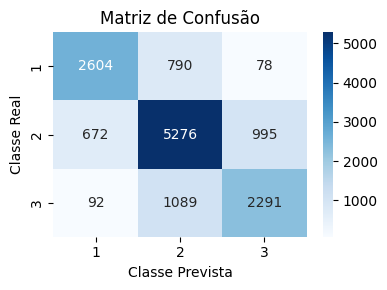

In [27]:
cf_matrix = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test) 
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.savefig('confusion_rf.pdf')
plt.show()


## Implementação do SHapley Additive exPlanations Para o modelo Random Forest Classifier

In [28]:
print("\nGerando explicações SHAP para o modelo...")

explainer = shap.TreeExplainer(rf_classifier)


Gerando explicações SHAP para o modelo...


In [29]:
X_test_sample_np = X_test
#feature_names_for_plot = features

In [30]:
# --- CÁLCULO DOS SHAP VALUES ---
shap_values = explainer.shap_values(X_test)

print(f"Valores SHAP calculados para uma amostra de {len(X_test)} instâncias.")

Valores SHAP calculados para uma amostra de 13887 instâncias.



--- VERIFICAÇÃO FINAL DE SHAP VALUES SHAPE ---
Tipo de shap_values: <class 'numpy.ndarray'>
Shape completo de shap_values: (13887, 7, 3)
Shape esperado para uma claplt.tight_layout()sse (amostras, features): (13887, 7)
Classes do modelo (rf_classifier.classes_): [1 2 3]
Quartil 1 (valor 1) está no índice de classe: 0
Shape de shap_values_for_class_1_plot: (13887, 7)
--- FIM DA VERIFICAÇÃO FINAL ---


Gerando Gráfico de Barra de Importância SHAP (Bar Plot)...


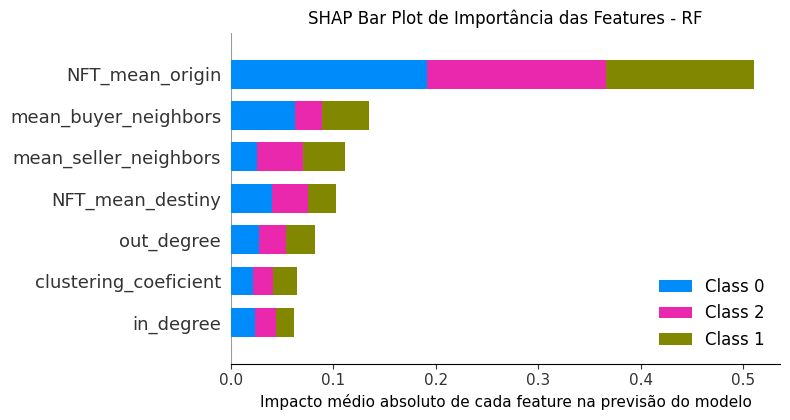

Gráfico de Barra de Importância SHAP salvo como 'shap_bar_importance_plot_sample.png'
Gerando Gráfico de Resumo SHAP (Beeswarm Plot) para a Classe 1...


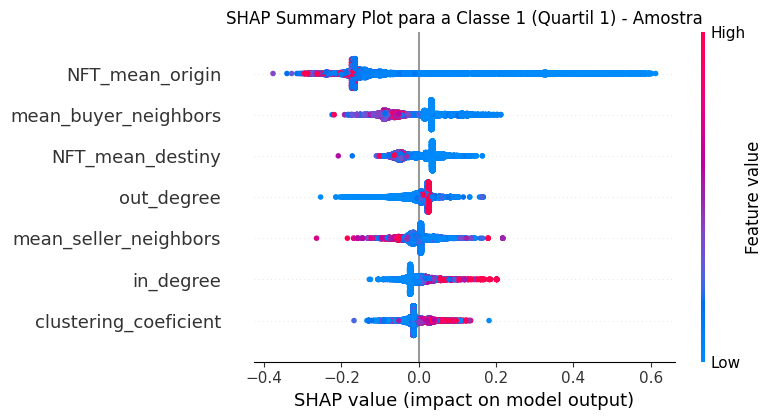

Gráfico de Resumo SHAP (Classe 1) salvo como 'shap_summary_plot_class_1_sample.png'

Gerando Gráficos de Dependência SHAP para as 3 features mais importantes...
As 3 features mais importantes são: ['NFT_mean_origin', 'mean_buyer_neighbors', 'mean_seller_neighbors']
Gerando SHAP Dependence Plot para: NFT_mean_origin


<Figure size 400x300 with 0 Axes>

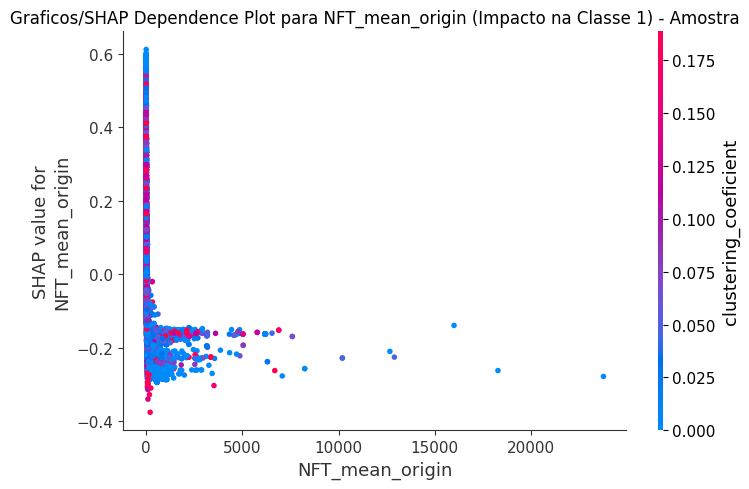

SHAP Dependence Plot para NFT_mean_origin salvo como 'shap_dependence_plot_NFT_mean_origin_sample.png'
Gerando SHAP Dependence Plot para: mean_buyer_neighbors


<Figure size 400x300 with 0 Axes>

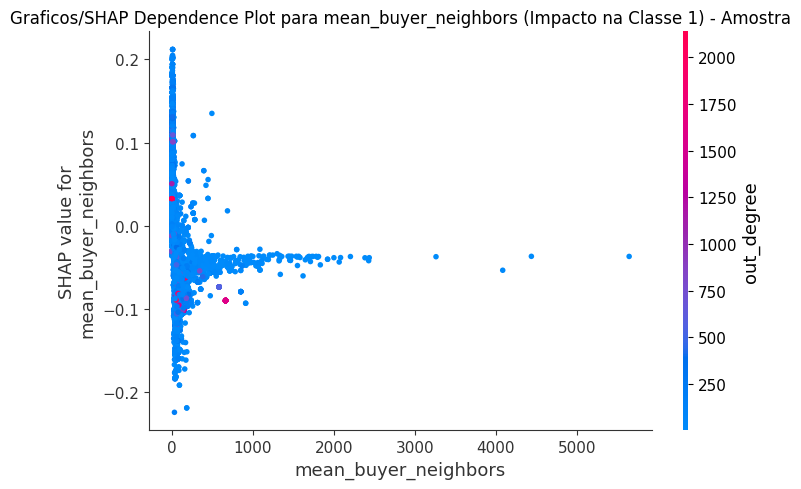

SHAP Dependence Plot para mean_buyer_neighbors salvo como 'shap_dependence_plot_mean_buyer_neighbors_sample.png'
Gerando SHAP Dependence Plot para: mean_seller_neighbors


<Figure size 400x300 with 0 Axes>

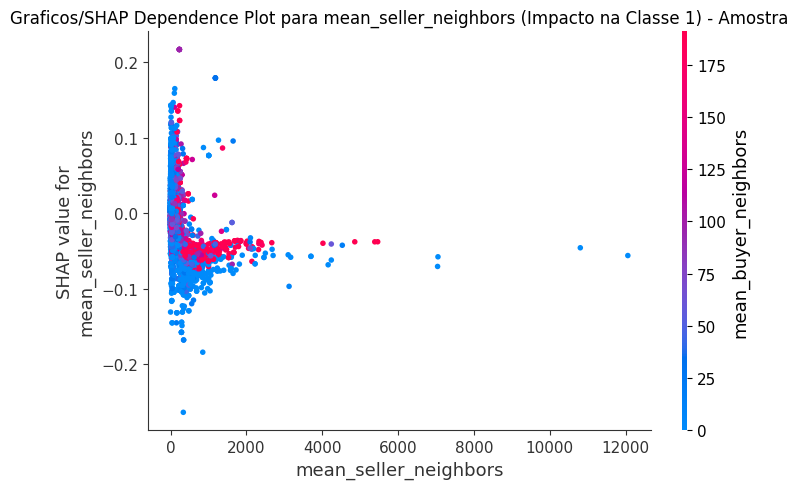

SHAP Dependence Plot para mean_seller_neighbors salvo como 'shap_dependence_plot_mean_seller_neighbors_sample.png'

Processo concluído! Os gráficos devem ser gerados corretamente agora.


In [31]:

# --- VERIFICAÇÃO FINAL DA DIMENSÃO ---
print("\n--- VERIFICAÇÃO FINAL DE SHAP VALUES SHAPE ---")
print(f"Tipo de shap_values: {type(shap_values)}")
print(f"Shape completo de shap_values: {shap_values.shape}") # Deve ser (amostras, features, classes)
print(f"Shape esperado para uma claplt.tight_layout()sse (amostras, features): ({X_test_sample_np.shape[0]}, {X_test_sample_np.shape[1]})")


class_names = rf_classifier.classes_
print(f"Classes do modelo (rf_classifier.classes_): {class_names}")

try:
    index_of_class_1_quartil = np.where(class_names == 1)[0][0]
    print(f"Quartil 1 (valor 1) está no índice de classe: {index_of_class_1_quartil}")
except IndexError:
    print("Atenção: A classe '1' não foi encontrada em rf_classifier.classes_. Verifique os valores únicos de y_train.")
    # Fallback, assumindo o primeiro índice se 1 não for encontrado
    index_of_class_1_quartil = 0 


shap_values_for_class_1_plot = shap_values[:, :, index_of_class_1_quartil]
print(f"Shape de shap_values_for_class_1_plot: {shap_values_for_class_1_plot.shape}")
print("--- FIM DA VERIFICAÇÃO FINAL ---\n")

print("\nGerando Gráfico de Barra de Importância SHAP (Bar Plot)...")
plt.figure(figsize=(4, 3))
shap.summary_plot(shap_values, X_test_sample_np, plot_type="bar", feature_names=feature_names_for_plot, show=False)
plt.title('SHAP Bar Plot de Importância das Features - RF')
plt.xlabel('Impacto médio absoluto de cada feature na previsão do modelo', fontsize = 11)
plt.tight_layout()
plt.savefig('Graficos/shap_bar_importance_plot_sample.png')
plt.show()
plt.close()
print("Gráfico de Barra de Importância SHAP salvo como 'shap_bar_importance_plot_sample.png'")


print("Gerando Gráfico de Resumo SHAP (Beeswarm Plot) para a Classe 1...")
plt.figure(figsize=(4, 3))
shap.summary_plot(shap_values_for_class_1_plot, X_test_sample_np, feature_names=feature_names_for_plot, show=False)
plt.title('SHAP Summary Plot para a Classe 1 (Quartil 1) - Amostra')
plt.tight_layout()
plt.savefig('Graficos/shap_summary_plot_class_1_sample.png')
plt.show()
plt.close()
print("Gráfico de Resumo SHAP (Classe 1) salvo como 'shap_summary_plot_class_1_sample.png'")


print("\nGerando Gráficos de Dependência SHAP para as 3 features mais importantes...")

mean_abs_shap_values_per_feature = np.mean(np.abs(shap_values), axis=(0, 2)) 
                                                                           

feature_importance_df = pd.DataFrame({
    'feature': feature_names_for_plot,
    'mean_abs_shap_value': mean_abs_shap_values_per_feature
})
feature_importance_df = feature_importance_df.sort_values(by='mean_abs_shap_value', ascending=False)
top_3_features = feature_importance_df['feature'].head(3).tolist()

print(f"As 3 features mais importantes são: {top_3_features}")

for feature in top_3_features:
    print(f"Gerando SHAP Dependence Plot para: {feature}")
    plt.figure(figsize=(4, 3))
    shap.dependence_plot(feature, shap_values_for_class_1_plot, X_test_sample_np, feature_names=feature_names_for_plot, show=False)
    plt.title(f'Graficos/SHAP Dependence Plot para {feature} (Impacto na Classe 1) - Amostra')
    plt.tight_layout()
    plt.savefig(f'shap_dependence_plot_{feature}_sample.png')
    plt.show()
    plt.close()
    print(f"SHAP Dependence Plot para {feature} salvo como 'shap_dependence_plot_{feature}_sample.png'")

print("\nProcesso concluído! Os gráficos devem ser gerados corretamente agora.")

## Support Vector Machine 

In [32]:
from sklearn import svm

In [36]:
model_svm = svm.SVC(kernel='rbf', C=1.0, random_state=42, probability=True)

model_svm.fit(X_train_scaled, y_train)

y_pred = model_svm.predict(X_test_scaled)

print("Métricas de Avaliação do Modelo de Classificação:\n")

calcula_metricas(model_svm,y_test, X_test_scaled)


Métricas de Avaliação do Modelo de Classificação:

Acurácia: 0.7032
Precisão: 0.7510
Recall: 0.6440
F1-score: 0.6712
              precision    recall  f1-score   support

           1       0.59      0.76      0.66      3330
           2       0.88      0.66      0.75     11600
           3       0.47      0.83      0.60      2429

    accuracy                           0.70     17359
   macro avg       0.64      0.75      0.67     17359
weighted avg       0.77      0.70      0.71     17359



array([1, 2, 3, ..., 2, 1, 2], shape=(17359,))

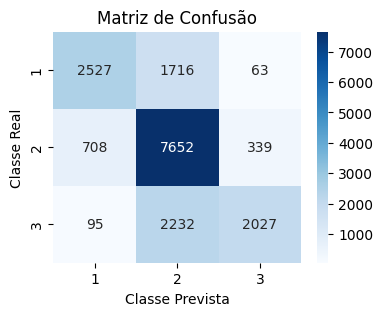

In [37]:
cm = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test) 

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.savefig('confusion_svm.pdf')
plt.show()

## Implementação do SHapley Additive exPlanations Para o modelo Support Vector Machine

In [38]:
background = shap.sample(X_train_scaled, 100) # Amostra de 100 instâncias

In [39]:
explainer = shap.KernelExplainer(model_svm.predict_proba, background)

In [ ]:
shap_values = explainer.shap_values(X_test_scaled)

  0%|                                     | 13/17359 [02:41<59:09:23, 12.28s/it]

In [ ]:
shap.summary_plot(shap_values[1], X_test_scaled, feature_names=X_test_scaled.columns)

In [ ]:
shap.dependence_plot("feature_0", shap_values[1], X_test_scaled, interaction_index=None, show=False)
plt.title('SHAP Dependence Plot para feature_0')
plt.show()


In [ ]:
shap.initjs() # Inicializa o JavaScript para o force plot
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test_scaled.iloc[0,:])


In [ ]:
class_names_model_list = model_svm.classes_.tolist()
try:
    index_of_class_1 = class_names_model_list.index(1)
    print(f"Classe '1' encontrada no índice: {index_of_class_1}")
except ValueError:
    print("Atenção: A classe '1' não foi encontrada em model_svm.classes_. Verifique os valores únicos de y_train.")
    
    index_of_class_1 = len(class_names_model_list) - 1
    print(f"Assumindo o índice {index_of_class_1} para a classe de interesse.")


shap_values_for_class_1_plot = shap_values_list[index_of_class_1]


# --- VERIFICAÇÃO FINAL DA DIMENSÃO  ---
print("\n--- VERIFICAÇÃO FINAL DE SHAP VALUES SHAPE ---")
print(f"Tipo de shap_values_list: {type(shap_values_list)}")
print(f"Número de arrays em shap_values_list (número de classes): {len(shap_values_list)}")
for i, sv_array in enumerate(shap_values_list):
    print(f"Shape de shap_values_list[{i}] (para classe {model_svm.classes_[i]}): {sv_array.shape}")

print(f"Shape esperado para uma classe (amostras, features): ({X_test_sample_np.shape[0]}, {X_test_sample_np.shape[1]})")

print(f"Classes do modelo (model_svm.classes_): {model_svm.classes_}")

print(f"SHAP values selecionados para o plot (classe {model_svm.classes_[index_of_class_1]}):")
print(f"Shape de shap_values_for_class_1_plot: {shap_values_for_class_1_plot.shape}")
print("--- FIM DA VERIFICAÇÃO FINAL ---\n")


# --- Geração de Gráficos SHAP ---

print("\nGerando Gráfico de Barra de Importância SHAP (Bar Plot)...")

plt.figure(figsize=(4, 3))
shap.summary_plot(shap_values_list, X_test_sample_np, plot_type="bar", feature_names=feature_names_for_plot, show=False)
plt.title('SHAP Bar Plot de Importância das Features (Média Absoluta Geral)')
plt.tight_layout()
plt.savefig('Graficos/shap_bar_importance_plot_sample.png')
plt.show()
plt.close()
print("Gráfico de Barra de Importância SHAP salvo como 'shap_bar_importance_plot_sample.png'")


print("Gerando Gráfico de Resumo SHAP (Beeswarm Plot) para a Classe de Interesse...")

plt.figure(figsize=(4, 3))
shap.summary_plot(shap_values_for_class_1_plot, X_test_sample_np, feature_names=feature_names_for_plot, show=False)
plt.title(f'SHAP Summary Plot para a Classe {model_svm.classes_[index_of_class_1]} - Amostra')
plt.tight_layout()
plt.savefig(f'Graficos/shap_summary_plot_class_{model_svm.classes_[index_of_class_1]}_sample.png')
plt.show()
plt.close()
print(f"Gráfico de Resumo SHAP (Classe {model_svm.classes_[index_of_class_1]}) salvo como 'shap_summary_plot_class_{model_svm.classes_[index_of_class_1]}_sample.png'")


print("\nGerando Gráficos de Dependência SHAP para as 3 features mais importantes...")


mean_abs_shap_values_all_classes = np.mean([np.mean(np.abs(sv_array), axis=0) for sv_array in shap_values_list], axis=0)

feature_importance_df = pd.DataFrame({
    'feature': feature_names_for_plot,
    'mean_abs_shap_value': mean_abs_shap_values_all_classes
})
feature_importance_df = feature_importance_df.sort_values(by='mean_abs_shap_value', ascending=False)
top_3_features = feature_importance_df['feature'].head(3).tolist()

print(f"As 3 features mais importantes são: {top_3_features}")

for feature in top_3_features:
    print(f"Gerando SHAP Dependence Plot para: {feature}")
    
    plt.figure(figsize=(4, 3))
    shap.dependence_plot(feature, shap_values_for_class_1_plot, X_test_sample_np, feature_names=feature_names_for_plot, show=False)
    plt.title(f'SHAP Dependence Plot para {feature} (Impacto na Classe {model_svm.classes_[index_of_class_1]}) - Amostra')
    plt.tight_layout()
    plt.savefig(f'Graficos/shap_dependence_plot_{feature}_sample.png')
    plt.show()
    plt.close()
    print(f"SHAP Dependence Plot para {feature} salvo como 'Graficos/shap_dependence_plot_{feature}_sample.png'")

print("\nProcesso concluído! Os gráficos foram gerados e salvos no diretório 'Graficos'.")